In [1]:
#Import necessary libraries
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Reading the file into a dataframe
df = pd.read_csv("noisypopulation.csv")
df.head()

,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [3]:
x = df['x']
y = df['y']
f = df['f']

In [4]:
# Function to compute the Polynomial Features for the data x for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(d).fit_transform(x.to_numpy().reshape(-1, 1))    

In [5]:
# Function to fit a Linear Regression model
def make_predict_with_model(x, y, x_pred):
    lreg = LinearRegression()
    lreg.fit(x, y)
    y_pred = lreg.predict(x_pred)
    return lreg, y_pred

In [6]:
# Function to perform sampling and fit the data, with the following parameters

# degree is the maximum degree of the model
# num_sample is the number of samples
# size is the number of random points selected from the data for each sample
# x is the predictor variable
# y is the response variable

def gen(degree, num_sample, size, x, y):
    
    # Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []
    
    # Loop over the number of samples
    for i in range(num_sample):
        
        # Helper code to call the make_predict_with_model function to fit on the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        # lreg and y_pred hold the model and predicted values for the current sample
        lreg, y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        # Append the model and predicted values to the appropriate lists
        predicted_values.append(y_pred)
        linear_models.append(lreg)
    
    # Return the 2 lists, one for predicted values and one for the model
    return predicted_values, linear_models

In [7]:
# Get results for degree 1
predicted_1, model_1 = gen(1, 200, 30, x, y);

# Get results for degree 100
predicted_100, model_100 = gen(100, 200, 30, x, y);

In [8]:
# Helper function to define plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes
    

<Figure size 1200x800 with 0 Axes>

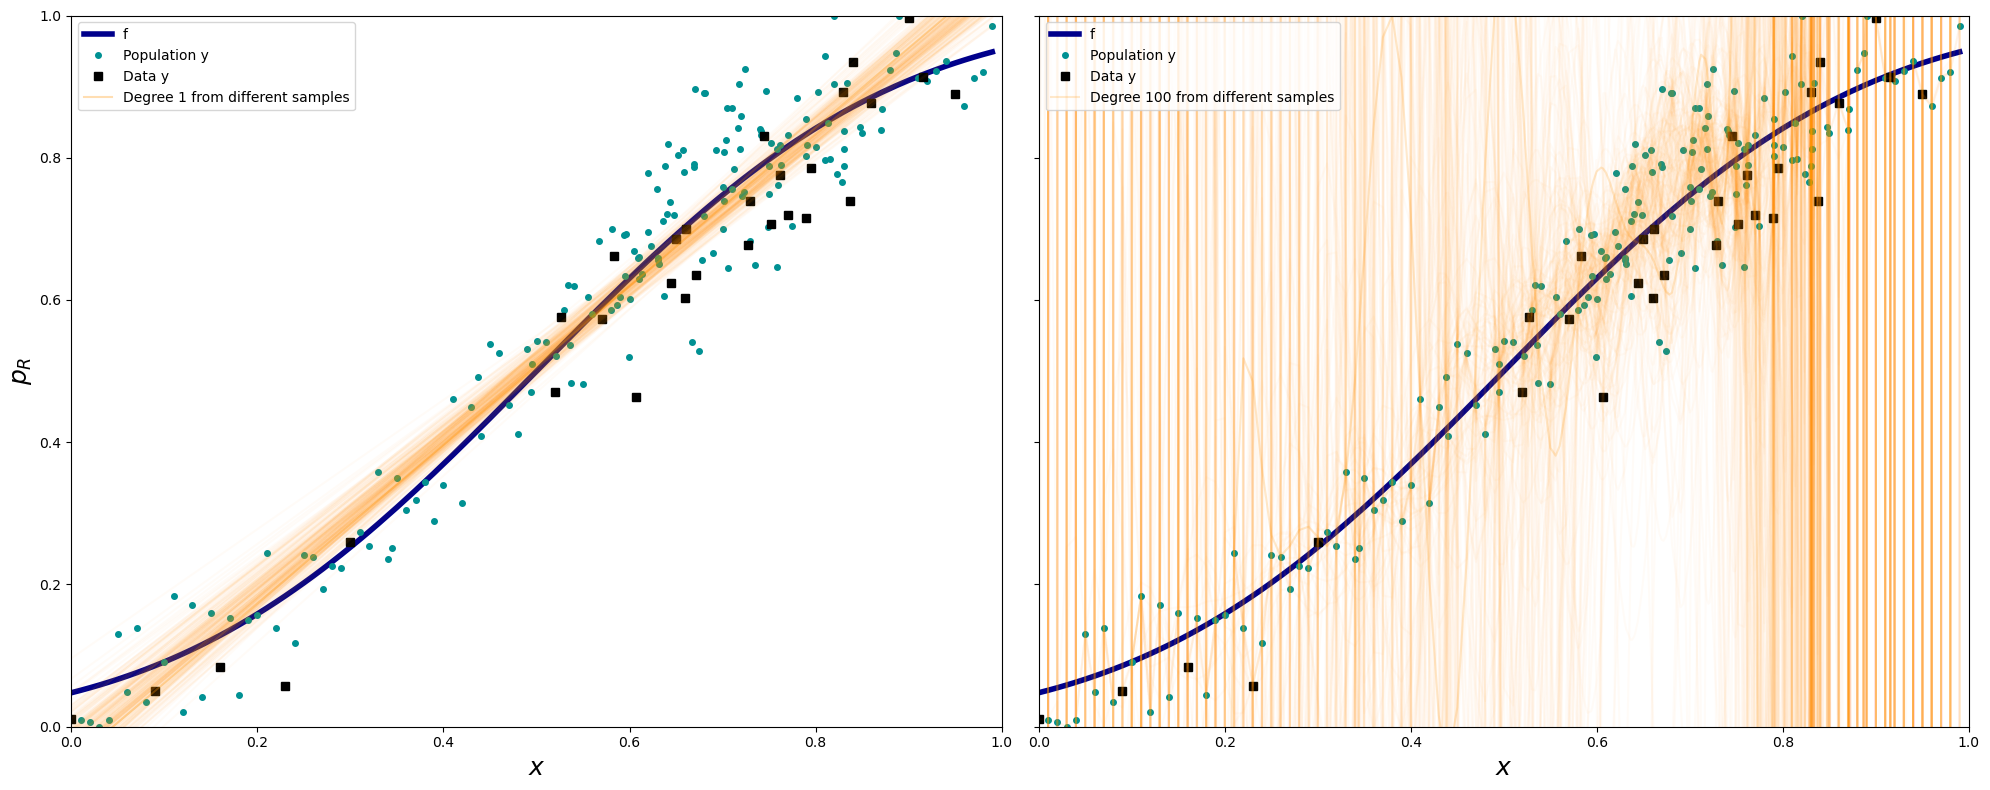

In [9]:
# Helper code to plot the data
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

plt.figure(figsize = (12,8))
axes=make_plot()

# Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


# Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.show();

In [10]:
#https://harvard-iacs.github.io/2021-CS109A/lectures/lecture06/notebook-2/